In [ ]:
!pip install scikit-learn

In [ ]:
!pip install matplotlib seaborn

In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

drive.mount("/content/drive")

dfpath = "/content/drive/MyDrive/Colab Notebooks/ProjectData/Final_data.csv"
df = pd.read_csv(dfpath)

Mounted at /content/drive


In [ ]:
df['is_healthy'] = (
    (df['BMI'].between(18.5, 24.9)) &
    (df['Fat_Percentage'] < 25) &
    (df['protein_per_kg'] > 0.8)
).astype(int)


In [ ]:
df['is_healthy'] = (df['cal_balance'] >= 0).astype(int)

## Features used in My Model


For my model, I will be the following features:
protein_per_kg
*   protein_per_kg
*   Fat_Percentage
*   Calories
*   protein_per_kg
*   Calories
*   BMI
*   Daily meals frequency

I chose these features because they showed clear patterns in my EDA. These features also made sense for predicting whether a person is healthy or unhealthy. I did not include Proteins, Carbs, and Fats because they had a perfect correlation (1.0) with each other, which means they were giving duplicate information to the model.

In [ ]:
healthy_unhealthy_cols = [
    'protein_per_kg',
    'Fat_Percentage',
    'Calories',
    'BMI',
    'Daily meals frequency'
]

X = df[healthy_unhealthy_cols]
y = df['is_healthy']

In [ ]:
y = df['is_healthy']

features = ['protein_per_kg', 'Fat_Percentage', 'Calories', 'BMI', 'Daily meals frequency']

X = df[features]

I added a new feature called is_healthy because the original dataset did not have one. I created this column using health-related features from the dataset, based on patterns I saw in my EDA. This new feature is the target for my models and lets them predict whether a person is healthy or unhealthy.

is_healthy = 1 means the person is considered healthy.
is_healthy = 0 means the person is considered unhealthy.

This will becomes the target for my machine learning models. It allows the models to learn a simple yes/no classification and predict health status using the other features in the dataset.

##Train / Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


##Baseline Model: Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("=== Decision Tree Results ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred_dt), 4))
print(classification_report(y_test, y_pred_dt))

=== Decision Tree Results ===
Accuracy: 0.812
              precision    recall  f1-score   support

           0       0.35      0.37      0.36       566
           1       0.90      0.88      0.89      3434

    accuracy                           0.81      4000
   macro avg       0.62      0.63      0.63      4000
weighted avg       0.82      0.81      0.81      4000



##Confusion Matrix - Decision Tree

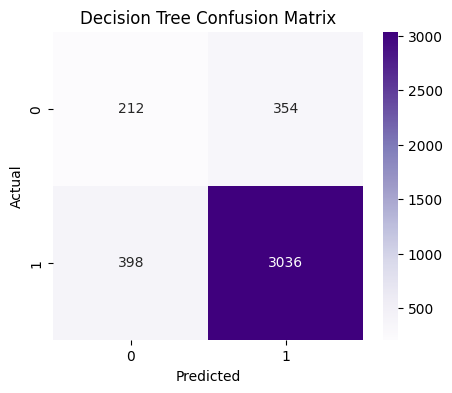

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Purples')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##Advanced Model: Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("=== Random Forest Results ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
print(classification_report(y_test, y_pred_rf))

=== Random Forest Results ===
Accuracy: 0.871
              precision    recall  f1-score   support

           0       0.60      0.26      0.36       566
           1       0.89      0.97      0.93      3434

    accuracy                           0.87      4000
   macro avg       0.75      0.62      0.65      4000
weighted avg       0.85      0.87      0.85      4000



##Confusion Matrix - Random Forest

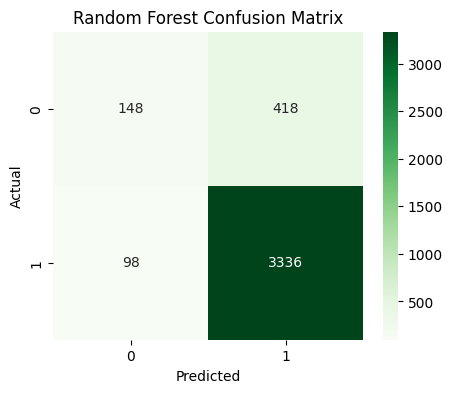

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()